In [1]:
# General
import pandas as pd
import numpy as np
import re

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Gensim
import gensim
from gensim.utils import simple_preprocess

# NLTK
import nltk
from nltk.corpus import stopwords

from collections import Counter
from wordcloud import WordCloud

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
# nltk
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import words
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.stem import LancasterStemmer

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
df = pd.read_csv('ceo_tweets.csv')
df.head(5)

,username,id,date,tweet,retweets,likes
0,@Benioff,1.520000e+18,4/30/2022 6:44,"RT @YoshikiOfficial: Beautiful place, Marc! \n...",457.0,0.0
1,@Benioff,1.520000e+18,4/30/2022 0:09,RT @MercedesAMG: A project which takes our par...,49.0,0.0
2,@Benioff,1.520000e+18,4/29/2022 7:32,RT @swbjoyce: Grateful to work with the best t...,27.0,0.0
3,@Benioff,1.520000e+18,4/29/2022 7:01,RT @btaylor: It was great to host many of the ...,10.0,0.0
4,@Benioff,1.520000e+18,4/29/2022 6:54,RT @btaylor: It was wonderful to reconnect wit...,9.0,0.0


In [5]:
df.shape

(54109, 6)

**Convert tweets to string**

In [6]:
 df["tweet"] = df["tweet"].apply(str)

In [7]:
warnings.simplefilter('ignore')

# NLTK Stop words 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
## Removing stop words, punctuation and tokenizing
stop = stopwords.words('english')
stop = stop + ['rt','amp']

In [9]:
def clean_tweet_split(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        p = ' '.join(re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)", " ", tweet).split())
        s = ' '.join(re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9_]+)", " ", p).split())
        return ' '.join(re.sub("(\w+:\/\/\S+)", " ", s).split())

In [10]:
def get_mentions(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        result = re.findall("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)", tweet) #(@[A-Za-z0-9]+)|
        return list(set(result))

In [11]:
def get_hashtags(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        result = re.findall("(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9_]+)", tweet) #(@[A-Za-z0-9]+)|
        return list(set(result))

In [12]:
def remove_links(tweet):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())

In [13]:
# function for lemmatization

lemma = nltk.wordnet.WordNetLemmatizer()
def lemmatize(text):
    return lemma.lemmatize(text)

In [15]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [16]:
#Create separate colums for mentions, tags, tokens and process the tokens
df["mentions"] = df["tweet"].apply(lambda tweet: get_mentions(tweet))
df["tags"] = df["tweet"].apply(lambda tweet: get_hashtags(tweet))

df["tweet_clean"] = df["tweet"].apply(lambda tweet: clean_tweet_split(tweet))

df["tweet_tokens"] = df["tweet_clean"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))
df["tweet_tokens"] = df["tweet_tokens"].apply(lambda list_of_words: [x for x in list_of_words if x not in stop])

df["tweet_tokens_lem"] = df["tweet_tokens"].apply(lambda list_of_words: [lemmatize(x) for x in list_of_words])

In [17]:
## Removing Less Frequent words
df["tweet_new"] = df["tweet"].apply(lambda tweet: remove_links(tweet))
df["tweet_new"] = df["tweet_new"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))
df["tweet_new"] = df["tweet_new"].apply(lambda list_of_words: [x for x in list_of_words if x not in stop])

In [18]:
d = dict(tuple(df.groupby('username')))

In [19]:
d['@MichaelDell']

,username,id,date,tweet,retweets,likes,mentions,tags,tweet_clean,tweet_tokens,tweet_tokens_lem,tweet_new
16232,@MichaelDell,1.520000e+18,4/29/2022 10:37,https://t.co/4ghKbejoie https://t.co/aquQvGL6QR,4.0,114.0,[],[],,[],[],[]
16233,@MichaelDell,1.520000e+18,4/28/2022 18:23,🤠 https://t.co/4ghKbe1NqG,7.0,136.0,[],[],🤠,[],[],[]
16234,@MichaelDell,1.520000e+18,4/28/2022 18:22,Here are the similarities and differences betw...,1163.0,19662.0,"[elonmusk, Dell, Twitter]",[],Here are the similarities and differences betw...,"[similarities, differences, take, private, tak...","[similarity, difference, take, private, take, ...","[similarities, differences, elonmusk, take, pr..."
16235,@MichaelDell,1.520000e+18,4/22/2022 22:19,Making infrastructure available for our custom...,8.0,53.0,[DellTech],[],Making infrastructure available for our custom...,"[making, infrastructure, available, customers,...","[making, infrastructure, available, customer, ...","[making, infrastructure, available, customers,..."
16236,@MichaelDell,1.520000e+18,4/22/2022 21:44,Circular design isn't the only thing we're doi...,5.0,60.0,[DellTech],[EarthDay],Circular design isn't the only thing we're doi...,"[circular, design, thing, drive, positive, imp...","[circular, design, thing, drive, positive, imp...","[circular, design, thing, delltech, drive, pos..."
...,...,...,...,...,...,...,...,...,...,...,...,...
19415,@MichaelDell,4.500000e+17,3/28/2014 19:22,RT @Inc: .@MichaelDell on why cybersecurity is...,43.0,0.0,[Inc],[],RT : .@MichaelDell on why cybersecurity is the...,"[michaeldell, cybersecurity, 1, u, business, r...","[michaeldell, cybersecurity, 1, u, business, r...","[inc, michaeldell, cybersecurity, 1, u, busine..."
19416,@MichaelDell,4.480000e+17,3/25/2014 2:58,RT @SiliconANGLE: Dell jumpstarts advanced ana...,11.0,0.0,[SiliconANGLE],[],RT : Dell jumpstarts advanced analytics strate...,"[dell, jumpstarts, advanced, analytics, strate...","[dell, jumpstart, advanced, analytics, strateg...","[siliconangle, dell, jumpstarts, advanced, ana..."
19417,@MichaelDell,4.480000e+17,3/24/2014 17:24,A big @Dell welcome to the @StatSoft team! We’...,44.0,10.0,"[Dell, StatSoft]",[],A big welcome to the team! We’re very excited ...,"[big, welcome, team, excited, welcome, family]","[big, welcome, team, excited, welcome, family]","[big, dell, welcome, statsoft, team, excited, ..."
19418,@MichaelDell,4.480000e+17,3/24/2014 16:28,RT @JoannMoretti: More on the acquisition of @...,9.0,0.0,"[matthewwolken, StatSoft, JoannMoretti]",[],RT : More on the acquisition of fr Congrats Ma...,"[acquisition, fr, congrats, matt, information,...","[acquisition, fr, congrats, matt, information,...","[joannmoretti, acquisition, statsoft, fr, matt..."


Next we generate some general **Descriptive Statistics for each CEO**:

**Count total number of characters and mean length of a tweet**

**Michael Dell**

In [20]:
count = d['@MichaelDell']['tweet'].str.split().str.len()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)

In [21]:
print("Total number of words:", count.sum(), "words")

Total number of words: 46294 words


In [22]:
print("Mean number of words per tweet:", round(count.mean(),2), "words")

Mean number of words per tweet: 14.52 words


In [23]:
d['@MichaelDell']["tweet_length"] = d['@MichaelDell']["tweet"].str.len()
print("Total length of the dataset is:", d['@MichaelDell'].tweet_length.sum(), "characters")

Total length of the dataset is: 353982 characters


In [24]:
print("Mean Length of a tweet is:", round(d['@MichaelDell'].tweet_length.mean(),0), "characters")
d['@MichaelDell'] = d['@MichaelDell'].drop(['tweet_length'], axis=1)

Mean Length of a tweet is: 111.0 characters


In [25]:
# Join the tweet back together
def rejoin_words(row):
    words = row['tweet_new']
    joined_words = (" ".join(words))
    return joined_words

In [26]:
d['@MichaelDell']['tweet']= df.apply(rejoin_words, axis=1)

In [31]:
all_words = ' '.join([text for text in d['@MichaelDell']['tweet_clean']])

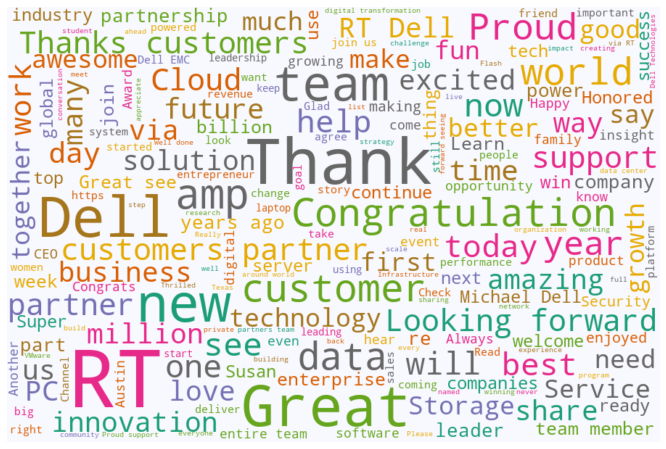

In [32]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='ghostwhite', 
                      max_words=200,colormap='Dark2').generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [41]:
d['@MichaelDell']["tweet_length"] = d['@MichaelDell']["tweet"].str.len()
d['@MichaelDell']["cleaned_tweet_length"] = d['@MichaelDell']["tweet_new"].str.len()
d_lengths = d['@MichaelDell'][['tweet_length', 'cleaned_tweet_length']]

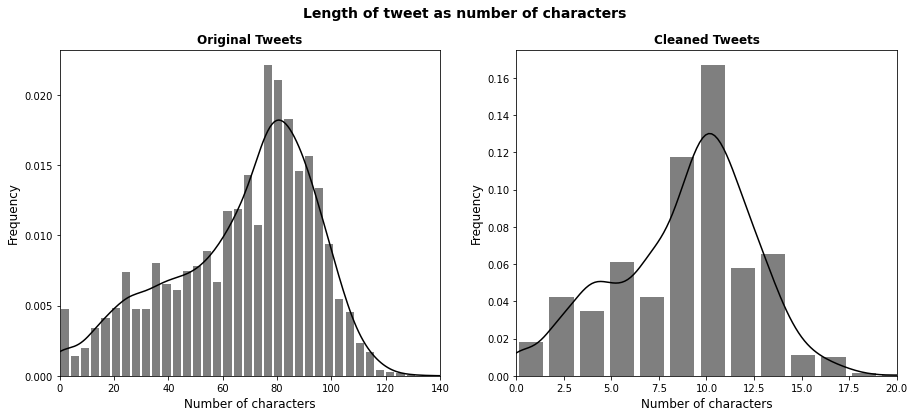

In [42]:
x1 = d_lengths.tweet_length
x2 = d_lengths.cleaned_tweet_length
plt.figure(figsize=(15,6))
plt.suptitle('Length of tweet as number of characters', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(x1, color="black", label="No. Words", bins=35, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title("Original Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of characters", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,140])

# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x2, color="black", label="No. Words", bins=17, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Cleaned Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of characters", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,20])

plt.show()

In [37]:
d['@MichaelDell']["tweet_new"].apply(str)

16232                                                   []
16233                                                   []
16234    ['similarities', 'differences', 'elonmusk', 't...
16235    ['making', 'infrastructure', 'available', 'cus...
16236    ['circular', 'design', 'thing', 'delltech', 'd...
                               ...                        
19415    ['inc', 'michaeldell', 'cybersecurity', '1', '...
19416    ['siliconangle', 'dell', 'jumpstarts', 'advanc...
19417    ['big', 'dell', 'welcome', 'statsoft', 'team',...
19418    ['joannmoretti', 'acquisition', 'statsoft', 'f...
19419    ['statsoft', 'true', 'long', 'track', 'record'...
Name: tweet_new, Length: 3188, dtype: object

In [44]:
d['@MichaelDell']["tweet_words"] = d['@MichaelDell']['tweet'].str.split().str.len()

d['@MichaelDell']["cleaned_tweet_words"] = d['@MichaelDell']['tweet_new'].apply(str).str.split().str.len()
d_lengths = d['@MichaelDell'][['tweet_words', 'cleaned_tweet_words']]

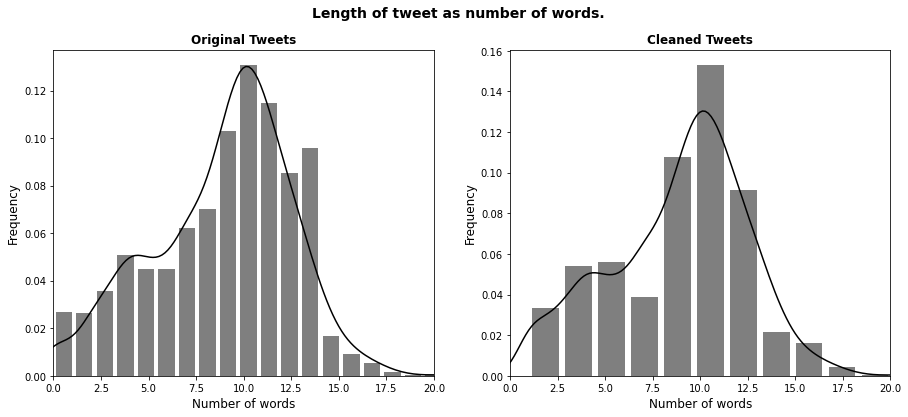

In [45]:
x_1 = d_lengths.tweet_words
x_2 = d_lengths.cleaned_tweet_words
plt.figure(figsize=(15,6))
plt.suptitle('Length of tweet as number of words.', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(x_1, color="black", label="No. Words", bins=25, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title("Original Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,20])



# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x_2, color="black", label="No. Words", bins=15, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Cleaned Tweets",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,20])

plt.show()

**Top 25 Most frequent Words**


In [47]:
word_freq = pd.Series(np.concatenate([x.split() for x in d['@MichaelDell']['tweet_new'].apply(str)])).value_counts()

In [48]:
word_df = pd.Series.to_frame(word_freq)
word_df['word'] = list(word_df.index)
word_df.reset_index(drop=True, inplace=True)
word_df.columns = ['freq', 'word']

Unique words: 8331


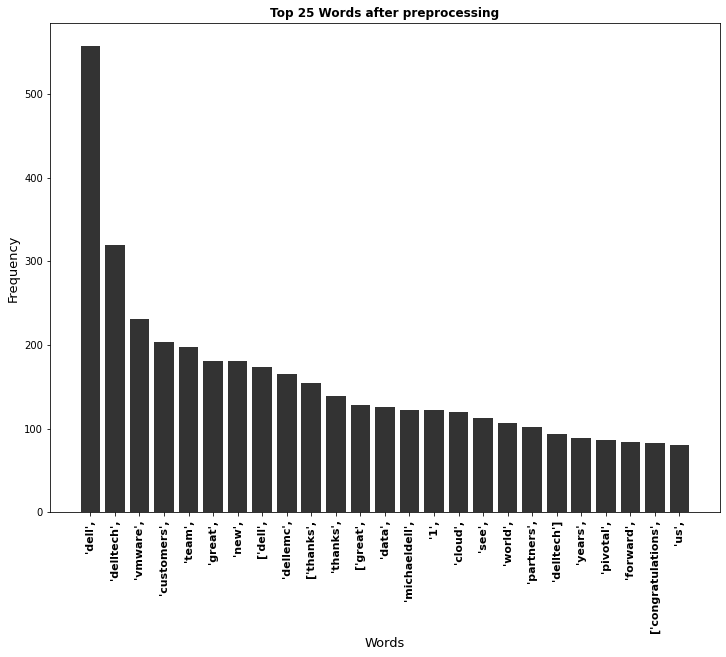

In [49]:
label = word_df['word'].head(25)
freq = word_df['freq'].head(25)
index = np.arange(len(freq))

print("Unique words:", len(word_df))
plt.figure(figsize=(12,9))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, label, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 25 Words after preprocessing', fontsize=12, fontweight="bold")
plt.show()

**Save Dataframe**

Lastly we save the pre-processed dataframe as a pickle, which is then used for Topic 
Modeling phase. That concludes the pre-processing phase of the analysis.


In [ ]:
df.to_pickle('pre-processed.pkl')